# Principal Componenet Analysis

## Principal Component Analysis on the Iris Dataset

PCA (Principal Component Analysis) is a dimensionality reduction technique used in data analysis and machine learning. It helps you to reduce the number of features in a dataset while keeping the most important information.
  
- PCA uses linear algebra to transform data into new features called principal components. It finds these by calculating eigenvectors (directions) and eigenvalues (importance) from the covariance matrix. 
- PCA selects the top components with the highest eigenvalues and projects the data onto them simplify the dataset.

In [19]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Loading the Iris dataset
Iris = sns.load_dataset('iris')
Iris_df = pd.DataFrame(Iris)
# Displaying the first few rows of the dataset
Iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


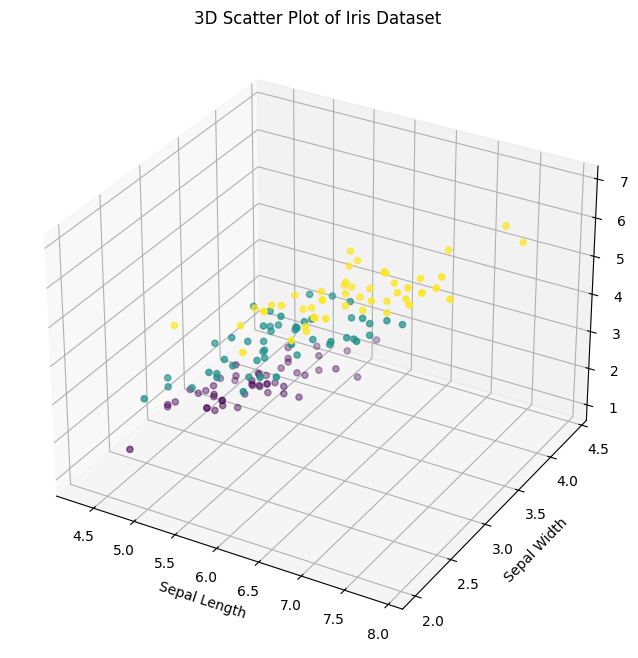

In [21]:
# Visualizing the three dimensional distribution of all the components
# Convert species to category first
Iris_df['species'] = Iris_df['species'].astype('category')

# Then get category codes
colors = Iris_df['species'].cat.codes

# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Iris_df['sepal_length'], Iris_df['sepal_width'], Iris_df['petal_length'],
           c=colors, cmap='viridis')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Scatter Plot of Iris Dataset')
plt.show()


## Step 1: Standardize the Data

Different features may have different units and scales like salary vs. age.
- Centering (subtracting the mean) makes features have mean = 0.
- Scaling (dividing by standard deviation) makes features have variance = 1.
  
Whether we scale depends on the units and magnitude of features:
  
If features are in different units (cm, kg, etc.) or different ranges, scaling is important — otherwise features with larger variance dominate PCA.
  
In Iris dataset, all features are lengths in cm, but ranges are different:
- Sepal length: ~4.3–7.9 cm
- Petal length: ~1.0–6.9 cm
  
This means petal length has a larger variance and will influence PCA more if we don’t scale.

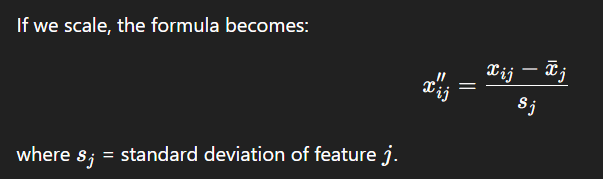

In [22]:
# Scaling the Iris Dataset by subtracting the mean and dividing by the standard deviation
# Scaling (manual)
numeric_cols = Iris_df.select_dtypes(include=['float64', 'int64'])
Iris_scaled_numeric = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()

## Step 2: Calculate Covariance Matrix

### **Covariance matrix**

Think of it as a **relationship map** between all features:

|                  | Sepal Length | Sepal Width | Petal Length | Petal Width |
| ---------------- | ------------ | ----------- | ------------ | ----------- |
| **Sepal Length** | variance     | cov         | cov          | cov         |
| **Sepal Width**  | cov          | variance    | cov          | cov         |
| **Petal Length** | cov          | cov         | variance     | cov         |
| **Petal Width**  | cov          | cov         | cov          | variance    |

* **Diagonal entries** = variance (spread) of each feature.
* **Off-diagonal entries** = covariance (how two features vary together).

If you imagine **four arrows** in space (one for each feature), the covariance matrix tells us how “in sync” each arrow’s changes are with the others.

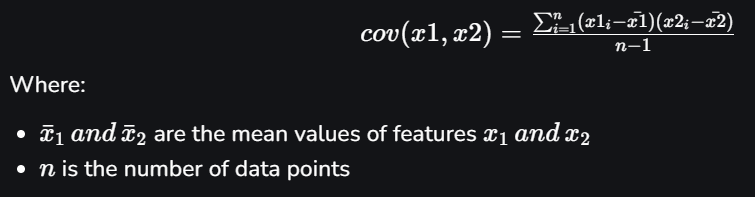

---

### **Eigenvectors in this context**

Imagine the Iris data as a cloud of points in **4D space**.

* Right now, the coordinate axes are **Sepal length**, **Sepal width**, **Petal length**, **Petal width**.
* The data cloud might be tilted — not aligned with these axes.

An **eigenvector** is a **special direction** in that space where:

* The data varies the most along that direction (if it’s the first eigenvector).
* Moving along this direction doesn’t “mix” with other directions — it’s a pure, principal direction of spread.

The **eigenvalue** linked to an eigenvector tells you *how much* variance the data has along that direction.

---

If we **sort eigenvectors** by their eigenvalues (largest first):

* **First eigenvector** → direction of maximum variance in the dataset.
* **Second eigenvector** → direction of next-most variance, but perpendicular to the first.
* And so on…

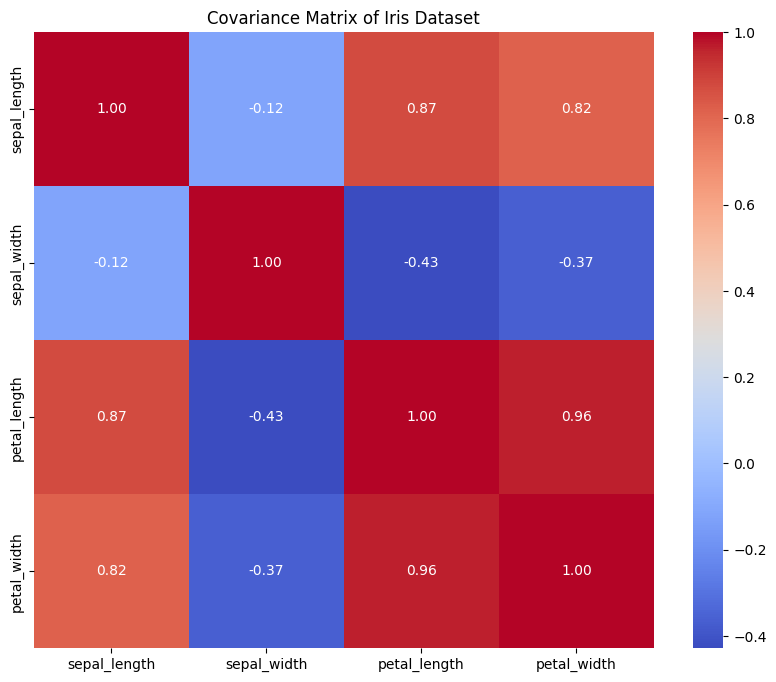

In [23]:
# Creating a Covariance Matrix from the Iris Dataset manually
Iris_covariance_matrix = np.cov(Iris_scaled_numeric, rowvar=False)
# Visualize the covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(Iris_covariance_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=numeric_cols.columns, yticklabels=numeric_cols.columns)
plt.title('Covariance Matrix of Iris Dataset')
plt.show()

In [24]:
feature_cols = numeric_cols.columns  # ['sepal_length','sepal_width','petal_length','petal_width']
cov_df = pd.DataFrame(
    Iris_covariance_matrix,
    index=feature_cols,
    columns=feature_cols
)
print(cov_df)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


## Step 3: Find the Principal Components

### Imagine the covariance matrix as a “shape map”

When you plot your centered data, it forms a **cloud of points**.
The covariance matrix tells you how **stretched** and **tilted** that cloud is.

* If there’s **no correlation** → the cloud is aligned with the x and y axes.
* If there **is correlation** → the cloud is tilted.

---

### Eigenvectors: the “natural axes” of the data

If you rotate your coordinate system so it lines up **perfectly** with the shape of the cloud, the new axes you get are **eigenvectors**.
They are the special directions where:

* The data variance is **pure** (no mix of x and y).
* Moving along one eigenvector is completely independent of moving along another.

---

### Eigenvalues: how much stretch each direction has

For each eigenvector, the eigenvalue tells you **how spread out** the data is in that direction.

* A big eigenvalue → lots of variance along that axis (important feature).
* A small eigenvalue → little variance along that axis (less important).

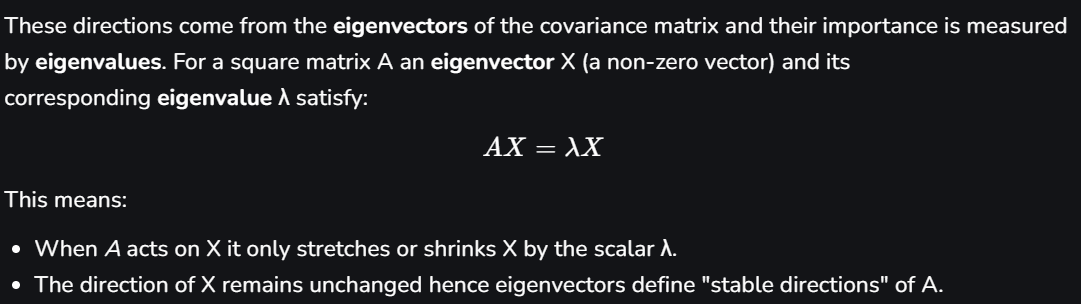

---

### PCA’s goal

PCA picks the eigenvector with the **largest eigenvalue** as the **first principal component** — the direction that captures the most variation in your data.
Then it picks the next biggest, and so on.



In [25]:
# Determining the eigen values and vectors in the Iris Dataset mathematically
Eigen_Values, Eigen_Vectors = np.linalg.eig(Iris_covariance_matrix)
print("Eigen Values: ", Eigen_Values)
print("Eigen Vectors: ", Eigen_Vectors)


Eigen Values:  [2.91849782 0.91403047 0.14675688 0.02071484]
Eigen Vectors:  [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


## Step 4: Pick the Top Directions & Transform Data

After calculating the eigenvalues and eigenvectors PCA ranks them by the amount of information they capture. We then:

- Select the top k components hat capture most of the variance like 95%.
- Transform the original dataset by projecting it onto these top components.

In [26]:
order = np.argsort(Eigen_Values)[::-1]
Eigen_Values = Eigen_Values[order]
Eigen_Vectors = Eigen_Vectors[:, order]
print("Eigen Values (sorted):", Eigen_Values)
print("Explained variance ratio:", Eigen_Values / Eigen_Values.sum())

# Selecting the top k components (after sorting)
k = 2
top_k_eigen_vectors = Eigen_Vectors[:, :k]
print("Top k Eigen Vectors:\n", top_k_eigen_vectors)


Eigen Values (sorted): [2.91849782 0.91403047 0.14675688 0.02071484]
Explained variance ratio: [0.72962445 0.22850762 0.03668922 0.00517871]
Top k Eigen Vectors:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [27]:
# Projecting the data onto the new feature space
Iris_reduced = np.dot(Iris_scaled_numeric, top_k_eigen_vectors)
print("Reduced Iris Dataset: ", Iris_reduced)


Reduced Iris Dataset:  [[-2.25714118 -0.47842383]
 [-2.07401302  0.67188269]
 [-2.35633511  0.34076642]
 [-2.29170679  0.59539986]
 [-2.3818627  -0.64467566]
 [-2.06870061 -1.4842053 ]
 [-2.43586845 -0.04748512]
 [-2.22539189 -0.222403  ]
 [-2.32684533  1.1116037 ]
 [-2.17703491  0.46744757]
 [-2.15907699 -1.04020587]
 [-2.31836413 -0.132634  ]
 [-2.2110437   0.72624318]
 [-2.62430902  0.95829635]
 [-2.19139921 -1.85384655]
 [-2.25466121 -2.67731523]
 [-2.20021676 -1.47865573]
 [-2.18303613 -0.48720613]
 [-1.89223284 -1.40032757]
 [-2.33554476 -1.1240836 ]
 [-1.90793125 -0.40749058]
 [-2.19964383 -0.92103587]
 [-2.76508142 -0.4568133 ]
 [-1.81259716 -0.08527285]
 [-2.21972701 -0.13679618]
 [-1.9453293   0.62352971]
 [-2.04430277 -0.24135499]
 [-2.1613365  -0.52538942]
 [-2.13241965 -0.312172  ]
 [-2.25769799  0.33660425]
 [-2.13297647  0.50285608]
 [-1.82547925 -0.42228039]
 [-2.60621687 -1.78758727]
 [-2.43800983 -2.1435468 ]
 [-2.10292986  0.45866527]
 [-2.20043723  0.20541922]
 [-2.

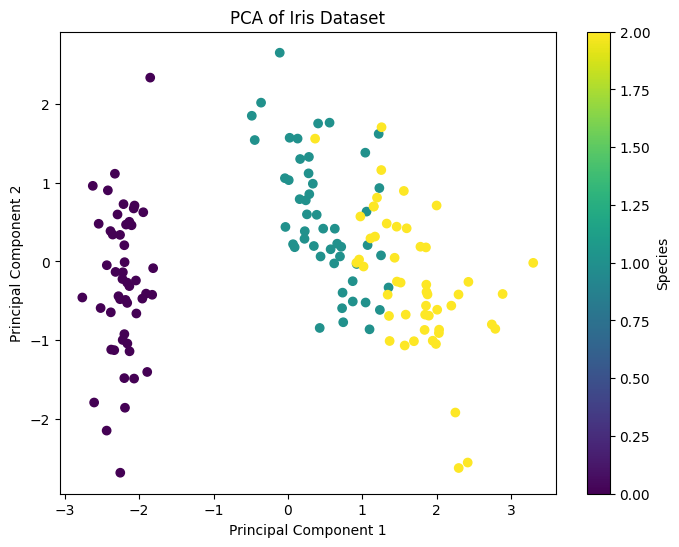

In [28]:
# Visualizing the reduced dataset
plt.figure(figsize=(8, 6))
species_codes = Iris_df['species'].cat.codes  # reuse earlier encoding
plt.scatter(Iris_reduced[:, 0], Iris_reduced[:, 1], c=species_codes, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Species')
plt.show()


### Verifying the results by using the PCA module from sklearn

In [29]:
# PCA using sklearn module
from sklearn.decomposition import PCA  

pca = PCA(n_components=2)
Iris_reduced_sklearn = pca.fit_transform(Iris_scaled_numeric)
print("Reduced Iris Dataset (sklearn): ", Iris_reduced_sklearn)

Reduced Iris Dataset (sklearn):  [[-2.25714118  0.47842383]
 [-2.07401302 -0.67188269]
 [-2.35633511 -0.34076642]
 [-2.29170679 -0.59539986]
 [-2.3818627   0.64467566]
 [-2.06870061  1.4842053 ]
 [-2.43586845  0.04748512]
 [-2.22539189  0.222403  ]
 [-2.32684533 -1.1116037 ]
 [-2.17703491 -0.46744757]
 [-2.15907699  1.04020587]
 [-2.31836413  0.132634  ]
 [-2.2110437  -0.72624318]
 [-2.62430902 -0.95829635]
 [-2.19139921  1.85384655]
 [-2.25466121  2.67731523]
 [-2.20021676  1.47865573]
 [-2.18303613  0.48720613]
 [-1.89223284  1.40032757]
 [-2.33554476  1.1240836 ]
 [-1.90793125  0.40749058]
 [-2.19964383  0.92103587]
 [-2.76508142  0.4568133 ]
 [-1.81259716  0.08527285]
 [-2.21972701  0.13679618]
 [-1.9453293  -0.62352971]
 [-2.04430277  0.24135499]
 [-2.1613365   0.52538942]
 [-2.13241965  0.312172  ]
 [-2.25769799 -0.33660425]
 [-2.13297647 -0.50285608]
 [-1.82547925  0.42228039]
 [-2.60621687  1.78758727]
 [-2.43800983  2.1435468 ]
 [-2.10292986 -0.45866527]
 [-2.20043723 -0.20541

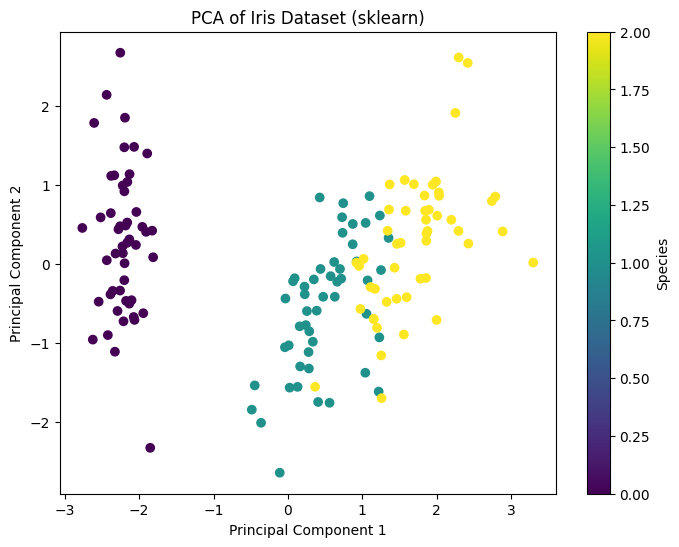

In [30]:
# Visualize the results
plt.figure(figsize=(8, 6))
species_codes = Iris_df['species'].cat.codes  # reuse earlier encoding
plt.scatter(Iris_reduced_sklearn[:, 0], Iris_reduced_sklearn[:, 1], c=species_codes, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (sklearn)')
plt.colorbar(label='Species')
plt.show()


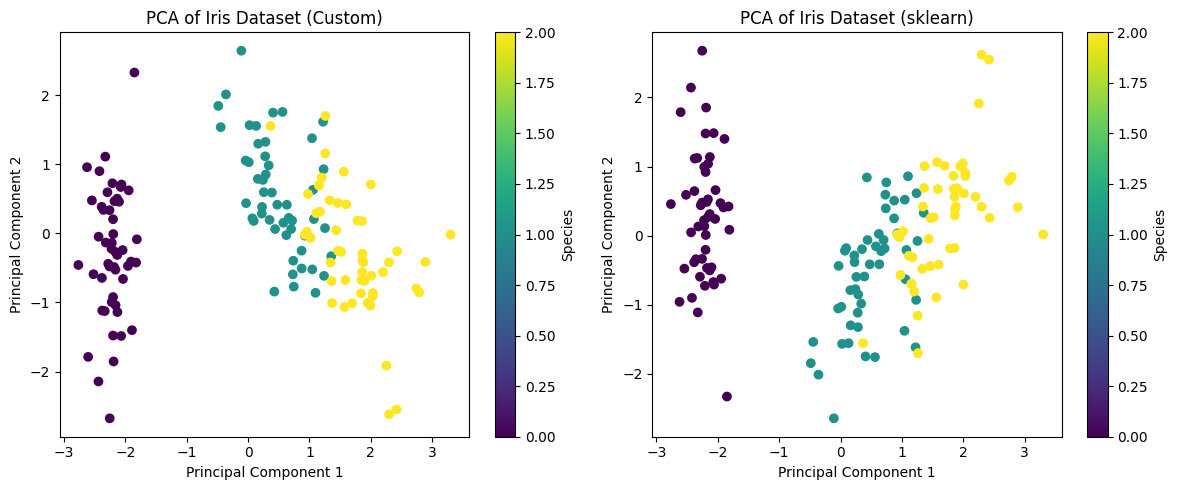

In [32]:
# Compare the visualizations of the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Original PCA visualization
plt.subplot(1, 2, 1)
plt.scatter(Iris_reduced[:, 0], Iris_reduced[:, 1], c=species_codes, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (Custom)')
plt.colorbar(label='Species')

# Sklearn PCA visualization
plt.subplot(1, 2, 2)
plt.scatter(Iris_reduced_sklearn[:, 0], Iris_reduced_sklearn[:, 1], c=species_codes, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (sklearn)')
plt.colorbar(label='Species')

plt.tight_layout()
plt.show()


Max abs diff after sign alignment: 7.993605777301127e-15
Explained variance ratio (manual): [0.72962445 0.22850762]
Explained variance ratio (sklearn): [0.72962445 0.22850762]


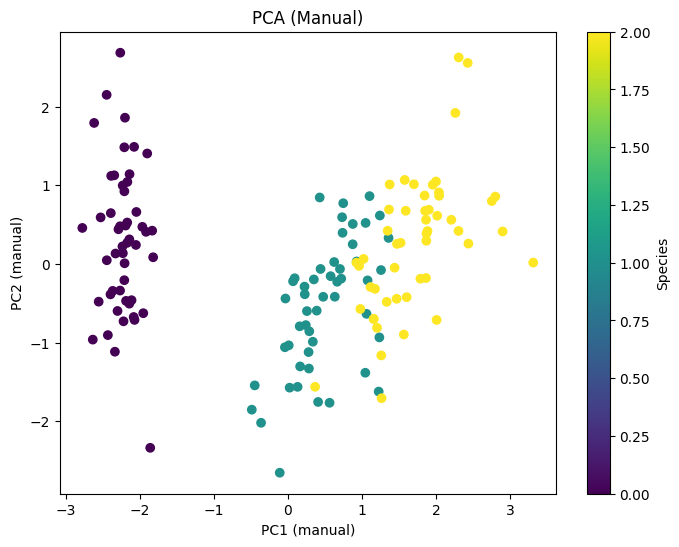

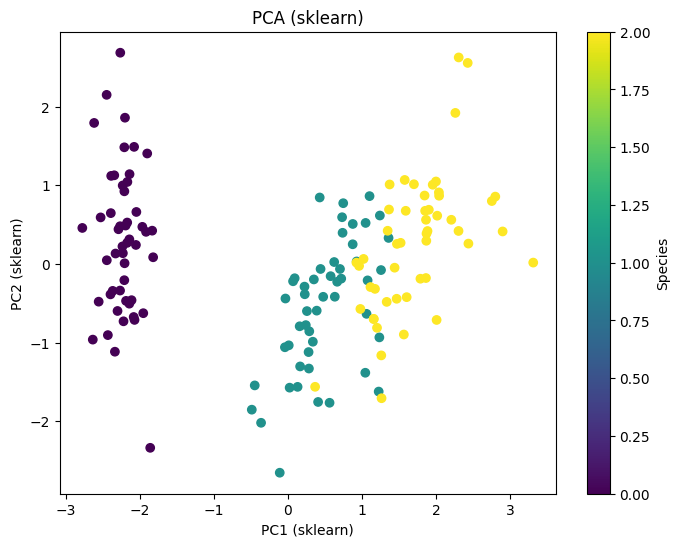

In [33]:
# === Consistent scaling ===
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(numeric_cols.values)  # shape (150,4)

# === Manual PCA via covariance (eigh) ===
cov = (X.T @ X) / (X.shape[0] - 1)            # same as sklearn internal
eigvals, eigvecs = np.linalg.eigh(cov)        # symmetric matrix -> eigh
order = np.argsort(eigvals)[::-1]
eigvals = eigvals[order]
eigvecs = eigvecs[:, order]                   # columns = components

k = 2
manual_components = eigvecs[:, :k].T          # shape (k, features) to match sklearn
manual_proj = X @ manual_components.T         # shape (n_samples, k)

# === Sklearn PCA ===
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
sk_proj = pca.fit_transform(X)

# === Align signs (optional) ===
for i in range(k):
    if np.corrcoef(manual_proj[:, i], sk_proj[:, i])[0,1] < 0:
        manual_proj[:, i] *= -1
        manual_components[i, :] *= -1

# === Compare ===
print("Max abs diff after sign alignment:",
      np.max(np.abs(manual_proj - sk_proj)))
print("Explained variance ratio (manual):", eigvals[:k] / eigvals.sum())
print("Explained variance ratio (sklearn):", pca.explained_variance_ratio_)

# Plot manual
plt.figure(figsize=(8,6))
species_codes = Iris_df['species'].cat.codes
plt.scatter(manual_proj[:,0], manual_proj[:,1], c=species_codes, cmap='viridis')
plt.xlabel('PC1 (manual)')
plt.ylabel('PC2 (manual)')
plt.title('PCA (Manual)')
plt.colorbar(label='Species')
plt.show()

# Plot sklearn
plt.figure(figsize=(8,6))
plt.scatter(sk_proj[:,0], sk_proj[:,1], c=species_codes, cmap='viridis')
plt.xlabel('PC1 (sklearn)')
plt.ylabel('PC2 (sklearn)')
plt.title('PCA (sklearn)')
plt.colorbar(label='Species')
plt.show()